# Basic Quantum Circuit

In [2]:
!pip install qiskit
from qiskit import Aer, QuantumCircuit, execute

     |████████████████████████████████| 6.1 MB 4.8 MB/s 
     |████████████████████████████████| 17.9 MB 103 kB/s 
     |████████████████████████████████| 235 kB 47.2 MB/s 
     |████████████████████████████████| 207 kB 37.8 MB/s 
     |████████████████████████████████| 2.1 MB 48.4 MB/s 
     |████████████████████████████████| 200 kB 51.8 MB/s 
     |████████████████████████████████| 1.4 MB 35.9 MB/s 
     |████████████████████████████████| 634 kB 35.7 MB/s 
     |████████████████████████████████| 52 kB 1.1 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
     |████████████████████████████████| 38.2 MB 19 kB/s 
     |████████████████████████████████| 943 kB 41.6 MB/s 
     |████████████████████████████████| 3.0 MB 42.0 MB/s 
     |████████████████████████████████| 6.3 MB 33.2 MB/s 
  Created wheel for qiskit: filename=qiskit-0.30.0-py3-none-any.whl size=11273 sha256=867ac5fd8db65cbd71cd4fdce06a769b3ca40ff13209766ef8b67c0452c8dfe4
  Stored in directory: /root/.cache/pip/whe

## Pauli-X Gate

In [ ]:
circuit = QuantumCircuit(1, 1)
circuit.x(0)
circuit.measure(0, 0)
circuit.draw()

┌───┐┌─┐
q_0: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(circuit)
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'1': 1024}


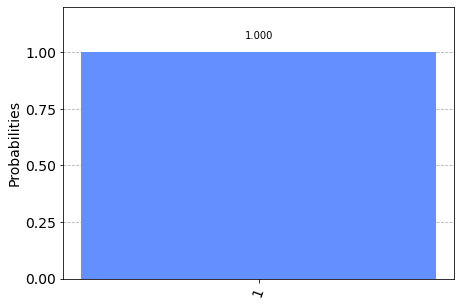

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## Hadamard Gate

In [ ]:
circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.measure(0, 0)
circuit.draw()

┌───┐┌─┐
q_0: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

{'0': 522, '1': 502}


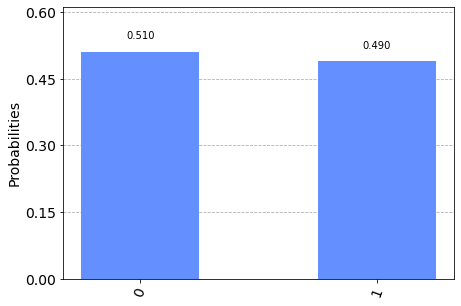

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(circuit)
result = job.result()
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)

## Controlled-Not Gate

In [ ]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [1, 0])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                1  0

{'11': 524, '00': 500}


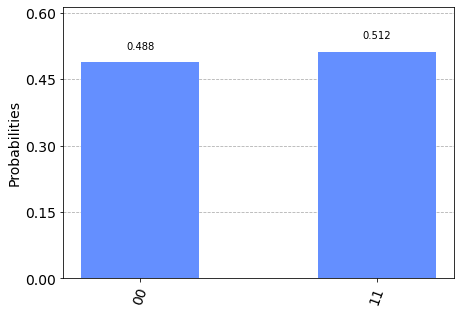

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(circuit)
result = job.result()
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)

In [ ]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.x(1)
circuit.cx(0, 1)
circuit.measure([0, 1], [1, 0])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     ├───┤┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                1  0

{'01': 528, '10': 496}


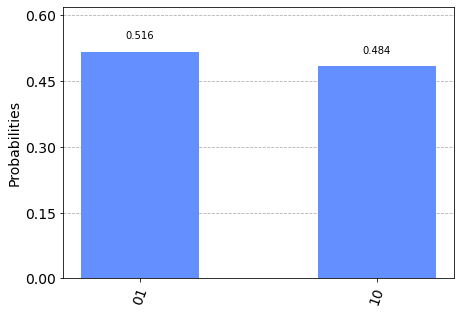

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(circuit)
result = job.result()
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)

# Quantum Programming Workflow

## 1. Import packages

In [3]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

## 2. Build quantum circuit

In [4]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.x(1)
circuit.cx(0, 1)
circuit.measure([0,1], [0,1])

## 3. Visualize the circuit

In [5]:
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     ├───┤┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

## 4. Simulate the experiment

In [6]:
simulator = QasmSimulator()
job = simulator.run(circuit, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count for 01 and 10 are:",counts)


Total count for 01 and 10 are: {'10': 500, '01': 500}


## 5. Visualize the results

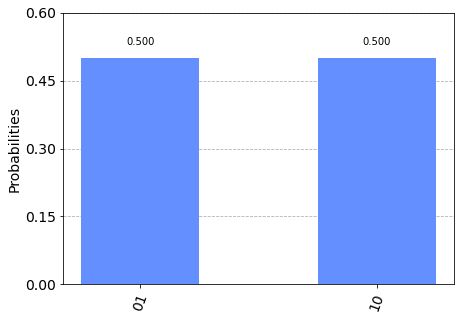

In [7]:
plot_histogram(counts)

# Deutsch's Algorithm

In [ ]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

def constant_oracle():
  circuit = QuantumCircuit(2)
  return circuit
def balanced_oracle():
  circuit = QuantumCircuit(2)
  circuit.cx(0, 1)
  return circuit

In [ ]:
circuit = QuantumCircuit(2, 1)
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.barrier()

circuit += constant_oracle()

circuit.barrier()
circuit.h(0)
circuit.measure(0, 0)
circuit.draw()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  import sys
/usr/local/lib/python3.7/dist-packages/qiskit/circuit/quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


┌───┐      ░  ░ ┌───┐┌─┐
q_0: ┤ H ├──────░──░─┤ H ├┤M├
     ├───┤┌───┐ ░  ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░──░───────╫─
     └───┘└───┘ ░  ░       ║ 
c: 1/══════════════════════╩═
                           0

{'0': 1024}


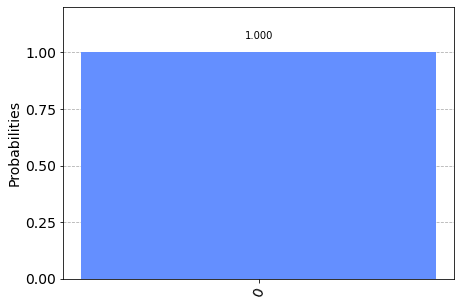

In [ ]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [ ]:
circuit = QuantumCircuit(2, 1)
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.barrier()

circuit += balanced_oracle()

circuit.barrier()
circuit.h(0)
circuit.measure(0, 0)
circuit.draw()

┌───┐      ░       ░ ┌───┐┌─┐
q_0: ┤ H ├──────░───■───░─┤ H ├┤M├
     ├───┤┌───┐ ░ ┌─┴─┐ ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░─┤ X ├─░───────╫─
     └───┘└───┘ ░ └───┘ ░       ║ 
c: 1/═══════════════════════════╩═
                                0

{'1': 1024}


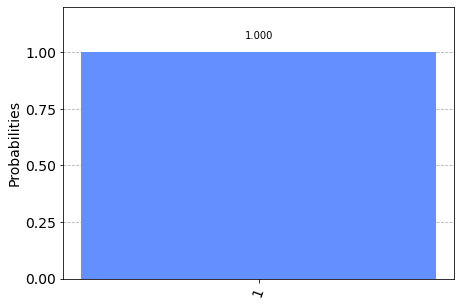

In [ ]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)